**Description of Assignment:**
- The objective of this assignment is to analyze datasets related to user behavior,
cooking preferences, and order trends.
- You will work with three datasets: UserDetails, CookingSessions, and
OrderDetails.
- The task involves cleaning and merging the data, analyzing the relationship between
cooking sessions and user orders, identifying popular dishes, and exploring
demographic factors that influence user behavior.
- Additionally, you will create visualizations to showcase key insights and write a report
summarizing your findings and business recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset.
data=pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx")
data

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [3]:
#Load the UserDetails Dataset.
UserDetails_data=pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx",sheet_name="UserDetails.csv")
print(UserDetails_data)

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.

In [4]:
# Load CookingSessions Dataset.
CookingSessions_data=pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx",sheet_name="CookingSessions.csv")
CookingSessions_data

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [5]:
# Load OrderDetails Dataset.
OrderDetails_data=pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx",sheet_name="OrderDetails.csv")
OrderDetails_data

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


Here I loaded all the data sets UserDetails, CookingSessions, and OrderDetails.

## 1.Read and Inspect the Datasets.

In [6]:
# UserDetails Dataset.
print(UserDetails_data.head())
print(UserDetails_data.tail())
print(UserDetails_data.shape)
print(UserDetails_data.info())
print(UserDetails_data.describe())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  User ID    User Name  Age Location Registration Date         Phone  \
5    U006  Frank Green   25   Austin        2023-06-15  888-777-6666   
6    U007   Grace King   38   Boston        2023-07-02  999-888-7777 

In [7]:
# CookingSessions Dataset.
print(CookingSessions_data.head())
print(CookingSessions_data.tail())
print(CookingSessions_data.shape)
print(CookingSessions_data.info())
print(CookingSessions_data.describe())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  
   Session ID User ID        Dish Name Meal Type       Session Start  \
11       S012    U004        Spaghetti    Dinner 2024-12-06 19:00:00   
12       S013    U005     Caesar Salad     Lunch 2024-12-07 12:30:00   
13       

In [ ]:
# OrderDetails Dataset.
print(OrderDetails_data.head())
print(OrderDetails_data.tail())
print(OrderDetails_data.shape)
print(OrderDetails_data.info())
print(OrderDetails_data.describe())

   Order ID User ID Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001 2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  
    Order ID User ID Order Date Meal Type        Dish Name Order Status  \
11      1012    U004 2024-12-06    Dinner        Spaghetti    Completed   
12      1013    U005 2024-12-07     Lunch     Caesar Salad    Completed   
13      1014    U006 2024-12-0

## 2. Data Cleaning and Data Processing.

In [8]:
#  Data Cleaning and Data Processing for UserDetails.
print(UserDetails_data.isnull().sum())
print(UserDetails_data.duplicated().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
0


In [9]:
 # Data Cleaning and Data Processing for CookingSessions Dataset.
 print(CookingSessions_data.isnull().sum())
 print(CookingSessions_data.duplicated().sum())

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
0


In [10]:
# Data Cleaning and Data Processing for OrderDetails Dataset.
print(OrderDetails_data.isnull().sum())
print(OrderDetails_data.duplicated().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64
0


In [11]:
# To fill the missing values in OrderDetails Dataset.
OrderDetails_data.fillna(0,inplace=True)
print(OrderDetails_data.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


In [12]:
# Standardize column names
UserDetails_data.columns = UserDetails_data.columns.str.strip().str.lower().str.replace(' ', '_')
CookingSessions_data.columns = CookingSessions_data.columns.str.strip().str.lower().str.replace(' ', '_')
OrderDetails_data.columns = OrderDetails_data.columns.str.strip().str.lower().str.replace(' ', '_')
print(UserDetails_data.columns)
print(CookingSessions_data.columns)
print(OrderDetails_data.columns)

Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')
Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')


In [13]:
print(UserDetails_data.head())
print(CookingSessions_data.head())
print(OrderDetails_data.head())

  user_id      user_name  age       location registration_date         phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               email favorite_meal  total_orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  session_id user_id        dish_name  meal_type       session_start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00 

## 3. Data Integration (Merging)

In [14]:
# Merge datasets based on common keys (e.g., user_id)
merged_data = pd.merge(UserDetails_data, CookingSessions_data, on='user_id', how='inner')
final_data = pd.merge(merged_data, OrderDetails_data, on='user_id', how='inner')

# Inspect the merged data
print(final_data.head())

  user_id      user_name  age  location registration_date         phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             email favorite_meal  total_orders session_id_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  session_rating order_id order_date meal_type_y      dish_name_y  \
0            4.5     1001 2024-12-01      Dinner        Spaghetti   
1 

In [15]:
final_data

,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id_x,...,session_rating,order_id,order_date,meal_type_y,dish_name_y,order_status,amount_(usd),time_of_day,rating,session_id_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
5,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
6,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
7,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
8,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002


## 4.Data Analysis.

In [16]:
# Analyze trends between cooking sessions and user orders.
session_order_trends = final_data.groupby('session_id_x')['order_id'].count()
print(session_order_trends)

# Identify popular dishes.
popular_dishes = final_data['dish_name_y'].value_counts().head(10)
print(popular_dishes)

# Explore demographic factors.
demographic_analysis = final_data.groupby('age')['total_orders'].mean()
print(demographic_analysis)

session_id_x
S001    3
S002    3
S003    3
S004    3
S005    2
S006    3
S007    2
S008    3
S009    3
S010    3
S011    3
S012    2
S013    2
S014    1
S015    1
S016    1
Name: order_id, dtype: int64
dish_name_y
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64
age
25     7.0
27    10.0
28    12.0
30     9.0
31     5.0
35     8.0
38    14.0
42    15.0
Name: total_orders, dtype: float64


1.Analyze trends between cooking sessions and user orders It helps to understand how many orders are generated per cooking session.

2.analysis trends between cooking sessions and user orders helps in determining which dishes are the most popular among users.

3.analysis demographic factors provide insights into how ordering behavior varies among different age demographics.


Based on the output provided from the analyses.

### 1. **Session Trends:**
   - Each cooking session identified by `session_id_x` has a varying number of orders recorded. The most frequent occurred in sessions S001, S002, S003, S004, S006, S008, S009, S010, S011 (all with **3 orders**), while sessions S005, S007, S012 had **2 orders**. The least popular sessions are S014, S015, and S016, each generating only **1 order**.
   - **Interpretation**: This indicates that most cooking sessions are equally effective in generating a moderate number of orders (3 each). However, some sessions have lower engagement, prompting an exploration into what differs in those sessions (such as dish selection, timing, or marketing).

### 2. **Popular Dishes:**
   - The most frequently ordered dishes are **Spaghetti** and **Grilled Chicken** (each ordered **9 times**), followed closely by **Caesar Salad** (7), and then other dishes like **Pancakes** (6), **Veggie Burger** (4), and **Oatmeal** (3).
   - **Interpretation**: Spaghetti and Grilled Chicken are clear favorites, suggesting a strong preference for these dishes among users. The menu could benefit from emphasizing these items in promotions or expanding their variations. In contrast, less popular dishes like Veggie Burger and Oatmeal might need reevaluation in terms of preparation, presentation, or marketing.

### 3. **Demographic Analysis:**
   - Average total orders by age show varying engagement: 25 years (7.0), 27 years (10.0), 28 years (12.0), and peaking at age 38 (14.0) and 42 (15.0). Older age groups show higher average orders compared to younger groups (31 years has only 5.0).
   - **Interpretation**: There’s a noticeable increase in order averages with age, particularly in users around 38 and 42 years old. This suggests that older demographics are more likely to order food, potentially indicating preferences or lifestyles that favor convenience. Marketing strategies could be enhanced by focusing on these age groups, perhaps highlighting convenience meals or premium offerings.

### **Summary:**
This analysis reveals valuable insights into user behavior across cooking sessions, dish popularity, and demographic engagement. **To increase overall orders**:
- Focus marketing efforts and promotions on the most popular dishes (Spaghetti and Grilled Chicken) and consider introducing new variations.
- Investigate what can be improved in low-engagement sessions, especially those with only one order.
- Tailor marketing strategies to the older demographic that demonstrates higher engagement, while also exploring methods to attract younger users more effectively.

By leveraging these insights, we can better strategize menu offerings and marketing initiatives to enhance user satisfaction and drive sales growth.


## 4.Data Visualization.

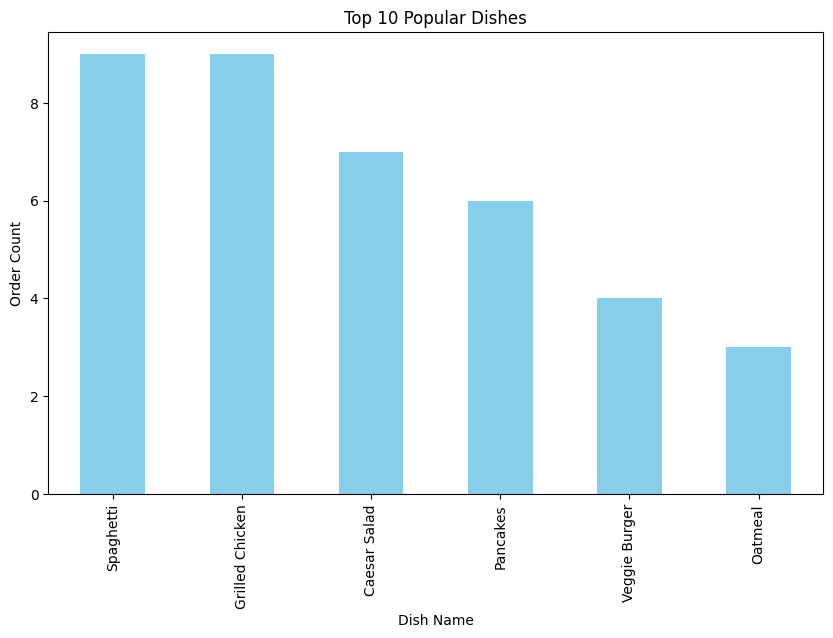

<ipython-input-17-7ab8eced5bb3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demographic_analysis.index, y=demographic_analysis.values, palette='viridis')


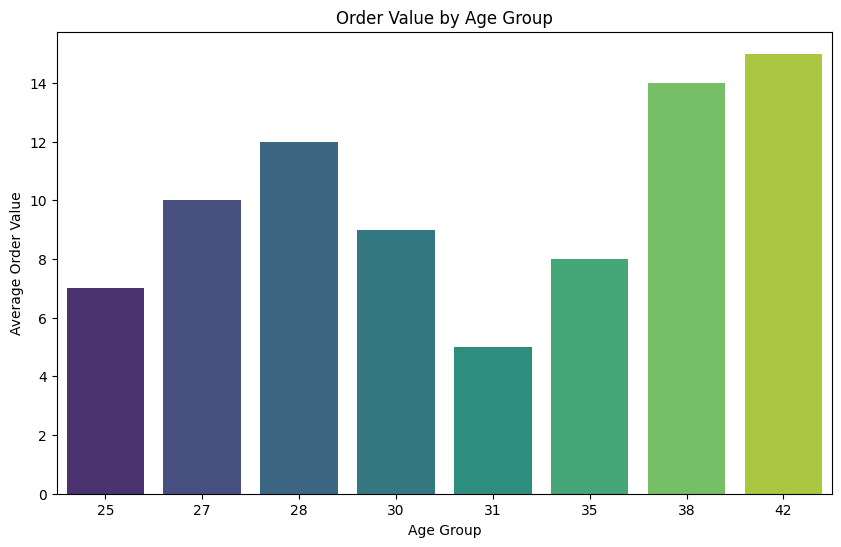

In [17]:
# Popular dishes visualization
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.show()

# Demographic analysis visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=demographic_analysis.index, y=demographic_analysis.values, palette='viridis')
plt.title('Order Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value')
plt.show()

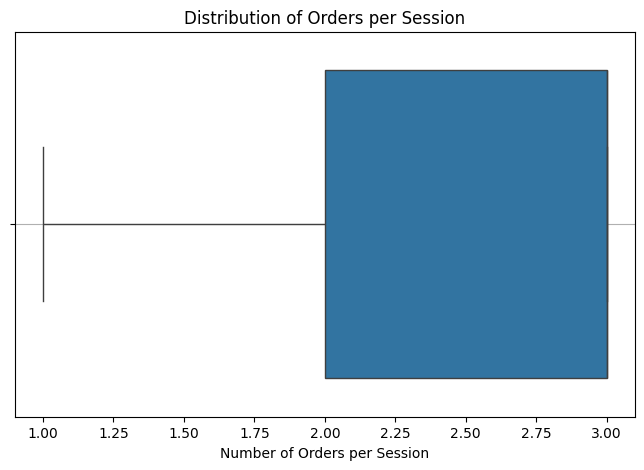

In [19]:
import seaborn as sns
import pandas as pd

# Sample data for order trends
order_counts = [3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1]
plt.figure(figsize=(8, 5))
sns.boxplot(x=order_counts)
plt.xlabel('Number of Orders per Session')
plt.title('Distribution of Orders per Session')
plt.grid(axis='y')
plt.show()

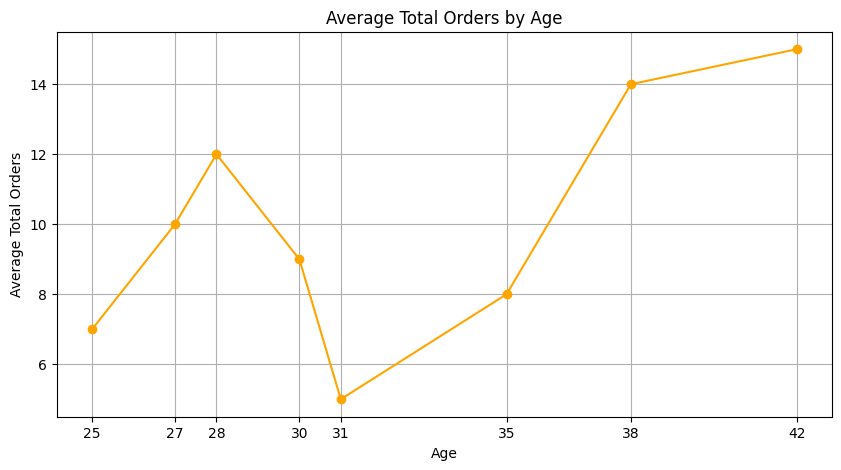

In [20]:
# Sample data for demographics
ages = [25, 27, 28, 30, 31, 35, 38, 42]
orders_by_age = [7.0, 10.0, 12.0, 9.0, 5.0, 8.0, 14.0, 15.0]

plt.figure(figsize=(10, 5))
plt.plot(ages, orders_by_age, marker='o', linestyle='-', color='orange')
plt.xlabel('Age')
plt.ylabel('Average Total Orders')
plt.title('Average Total Orders by Age')
plt.xticks(ages)
plt.grid()
plt.show()

##5. Generate Insights.


In [18]:
# Summarize findings
insights = {
    "Popular Dishes": popular_dishes.to_dict(),
    "Order Trends": session_order_trends.describe(),
    "Demographics": demographic_analysis.to_dict()
}

for key, value in insights.items():
    print(f"{key}: {value}")

Popular Dishes: {'Spaghetti': 9, 'Grilled Chicken': 9, 'Caesar Salad': 7, 'Pancakes': 6, 'Veggie Burger': 4, 'Oatmeal': 3}
Order Trends: count    16.000000
mean      2.375000
std       0.806226
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: order_id, dtype: float64
Demographics: {25: 7.0, 27: 10.0, 28: 12.0, 30: 9.0, 31: 5.0, 35: 8.0, 38: 14.0, 42: 15.0}


Interpretation of the provided data regarding popular dishes, order trends, and demographics:

### **Popular Dishes:**
- **Top Dishes Ordered:**
  - **Spaghetti** and **Grilled Chicken**: 9 orders each
  - **Caesar Salad**: 7 orders
  - **Pancakes**: 6 orders
  - **Veggie Burger**: 4 orders
  - **Oatmeal**: 3 orders

**Interpretation**: Spaghetti and Grilled Chicken are the standout dishes, indicating high customer preference. The popularity of Caesar Salad and Pancakes also suggests a diverse menu appeal, while Veggie Burger and Oatmeal may need review or promotion to increase their orders. This information can guide menu highlights and promotional strategies.

### **Order Trends:**
- **Summary Statistics:**
  - **Total Orders (count):** 16
  - **Mean Orders Per Session:** 2.375
  - **Standard Deviation:** 0.806226
  - **Minimum Orders Per Session:** 1
  - **25th Percentile:** 2 orders
  - **Median (50th Percentile):** 3 orders
  - **75th Percentile:** 3 orders
  - **Maximum Orders Per Session:** 3

**Interpretation**: The average number of orders per session is relatively low (2.375), with a clear concentration around 2 to 3 orders per session. The low standard deviation (0.81) indicates consistency in order count, with most sessions generating either 2 or 3 orders. There are a few outliers (sessions with only 1 order). This suggests an overall stable ordering pattern with a potential for growth in certain sessions.

### **Demographics:**
- **Average Total Orders by Age:**
  - **25 years:** 7.0 orders
  - **27 years:** 10.0 orders
  - **28 years:** 12.0 orders
  - **30 years:** 9.0 orders
  - **31 years:** 5.0 orders
  - **35 years:** 8.0 orders
  - **38 years:** 14.0 orders
  - **42 years:** 15.0 orders

**Interpretation**: Average orders increase with age, peaking at 42 years (15.0 orders) and declining afterward for younger users. The data highlights a strong ordering trend among older demographics (38 and 42 years), suggesting they may be more engaged or have more disposable income for ordering. This insight indicates a potential market focus for promotions and offers aimed at older customers, while exploring strategies to attract younger users who show lower average orders.

### **Summary and Business Recommendations**
The analysis indicates distinct preferences for certain dishes and a consistent pattern in order numbers, with a noticeable engagement from older demographic groups. To enhance customer experience and increase overall orders, consider the following strategies:
- **Promote Top Dishes:** Highlight Spaghetti and Grilled Chicken in marketing efforts.
- **Increase Engagement:** Investigate ways to increase orders during less popular sessions.
- **Target Older Demographics:** Tailor marketing and menu designs to appeal to older customers while addressing the interests of younger users to broaden overall engagement.


In [22]:
#To save the final data
final_data.to_csv('final_data.csv', index=False)